# Classifying Iris data set

** Immport Libraries**

In [1]:
import nltk

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

**Loading Iris data**

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Classifying the species**

To differentiate different species in numerical term lets set Iris-setosa as 1, Iris-versicolor as 2, Iris-virginica as 3.

In [5]:
def classify_species(x):
    if x == 'Iris-setosa':
        return 1
    if x == 'Iris-versicolor':
        return 2
    if x == 'Iris-virginica':
        return 3

In [6]:
data['Classification'] = data['Species'].apply(classify_species)

** Seperating our data into two variable, input X and output y**

y = data['Classification']
X = data.ix[:,'SepalLengthCm':'PetalWidthCm']
X

## Visualising data

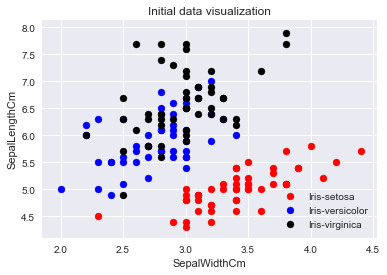

In [8]:
plt.scatter(X[y==1]['SepalWidthCm'],X[y==1]['SepalLengthCm'],c='red', label = 'Iris-setosa')
plt.scatter(X[y==2]['SepalWidthCm'],X[y==2]['SepalLengthCm'],c='blue',label = 'Iris-versicolor')
plt.scatter(X[y==3]['SepalWidthCm'],X[y==3]['SepalLengthCm'],c='black',label = 'Iris-virginica')
plt.legend()
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.title('Initial data visualization')

In [49]:
from sklearn import svm

In [156]:

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X['SepalWidthCm'].min() - 1, X['SepalWidthCm'].max() + 1
    x2_min, x2_max = X['SepalLengthCm'].min() - 1, X['SepalLengthCm'].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [158]:
X = np.array(data.iloc[:,[3,4]])
y = np.array(data['Classification'])

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model = svm.SVC(kernel='linear',C=2000)
model.fit(X_train,y_train)

SVC(C=2000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

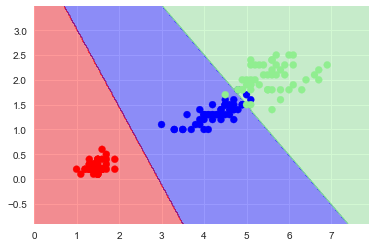

In [176]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)